# Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1) A single cell estimate of the population 16+ for each state.

2) Controls for Hispanic Origin by age and sex.

3) Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the data
df= pd.read_csv('Census_Income_Project.csv')

In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Let's check the features present in our data and then we will look at their data types.

In [5]:
df.ndim

2

In [6]:
df.shape

(32560, 15)

We have 14 independent variables and 1 target variable. We will predict the AveragePrice with the help of model built using the train data.
Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

We can see there are two format of data types:

1) int64: It represents the integer variables. Integer variables in our dataset are: Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week

2) object: It represents the categorical variables. Categorical variables in our dataset are: Workclass, Education, Martil_status, Occupation, Relationship, Race, Sex, Native_country, Income.

In [8]:
# We will look for any missing values in the dataset.
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

In [10]:
df['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

In [11]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [12]:
df['Occupation'].replace("?",'Other-service')
df['Occupation']

0           Exec-managerial
1         Handlers-cleaners
2         Handlers-cleaners
3            Prof-specialty
4           Exec-managerial
                ...        
32555          Tech-support
32556     Machine-op-inspct
32557          Adm-clerical
32558          Adm-clerical
32559       Exec-managerial
Name: Occupation, Length: 32560, dtype: object

In [13]:
df['Occupation']

0           Exec-managerial
1         Handlers-cleaners
2         Handlers-cleaners
3            Prof-specialty
4           Exec-managerial
                ...        
32555          Tech-support
32556     Machine-op-inspct
32557          Adm-clerical
32558          Adm-clerical
32559       Exec-managerial
Name: Occupation, Length: 32560, dtype: object

# Univariate Analysis

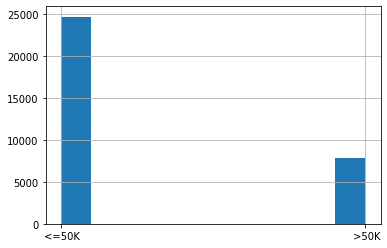

In [14]:
df['Income'].hist()

From above plot we can observe that income less than equal to 50k is more as compare to greater than 50k

# Bivariate Analysis

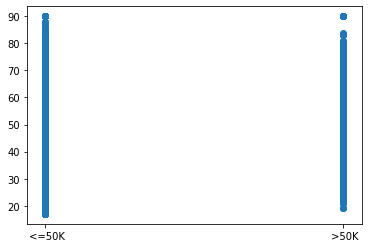

In [15]:
plt.scatter(df['Income'],df['Age'])

We can observe the relation between income and age from above plot. We can observe that income greater than 50k is of all age but no one age of 85 to 89 have income greater than 50k.

In [16]:
#plt.scatter(data=df, x=data.item(Occupation),y=data.item(Hours_per_week))

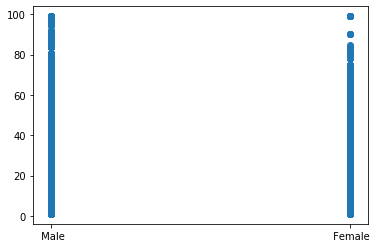

In [17]:
plt.scatter(df['Sex'],df['Hours_per_week'])

We can observe the relation between Sex and hours per week from above plot.

In [18]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Income']=le.fit_transform(df['Income'])
df['Sex']=le.fit_transform(df['Sex'])

In [20]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,United-States,0
1,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,United-States,0
2,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,United-States,0
3,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,Cuba,0
4,37,4,284582,12,14,2,4,Wife,White,0,0,0,40,United-States,0


# Multivariate Analysis

<Figure size 1584x864 with 0 Axes>

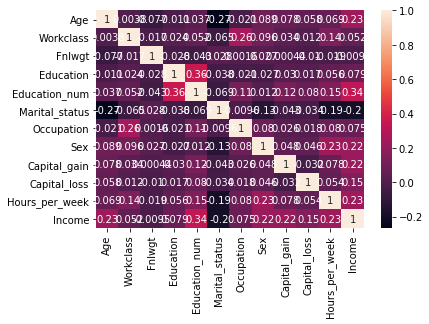

<Figure size 1584x864 with 0 Axes>

In [21]:
# Checking correlation
corr=df.corr()
sns.heatmap(corr, annot=True)
plt.figure(figsize=[22,12])

In [22]:
corr['Income'].sort_values()

Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.051645
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

In [23]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


Splitting of independent and target variable

In [24]:
x=df.drop(['Relationship','Race','Native_country','Fnlwgt','Income'], axis=1)

In [25]:
y=df['Income']

In [26]:
x.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,9,13,2,4,1,0,0,13
1,38,4,11,9,0,6,1,0,0,40
2,53,4,1,7,2,6,1,0,0,40
3,28,4,9,13,2,10,0,0,0,40
4,37,4,12,14,2,4,0,0,0,40


In [27]:
x.skew()

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [28]:
from sklearn.preprocessing import power_transform
pt=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(pt, columns=x.columns)
x.skew()

Age              -0.013897
Workclass         0.061629
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.187152
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
dtype: float64

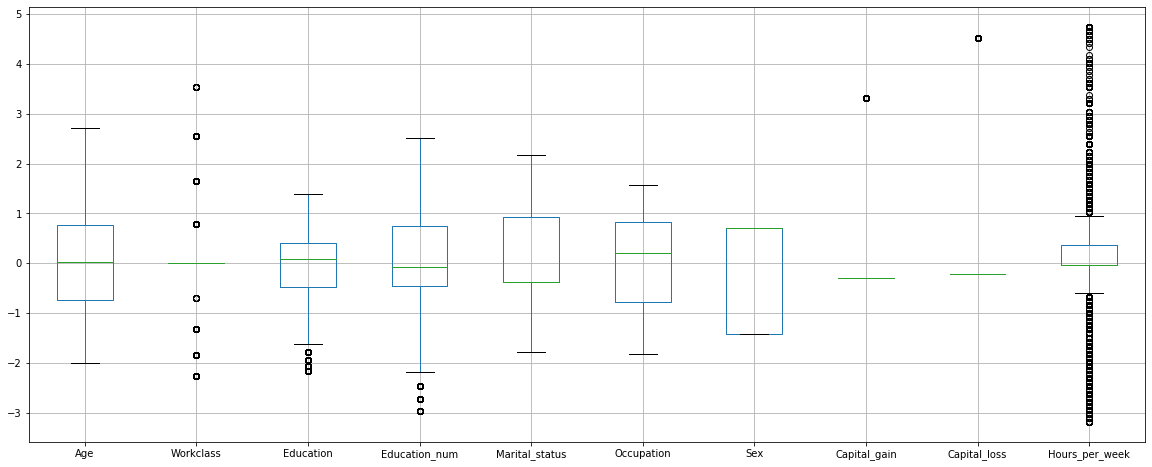

In [29]:
#Checking outliers
x.boxplot(figsize=[20,8])

In [30]:
from scipy import stats
df['Workclass']=stats.zscore(df['Workclass'])
df['Education']=stats.zscore(df['Education'])
df['Education_num']=stats.zscore(df['Education_num'])
df['Hours_per_week']=stats.zscore(df['Hours_per_week'])
df['Capital_gain']=stats.zscore(df['Capital_gain'])
df['Capital_loss']=stats.zscore(df['Capital_loss'])

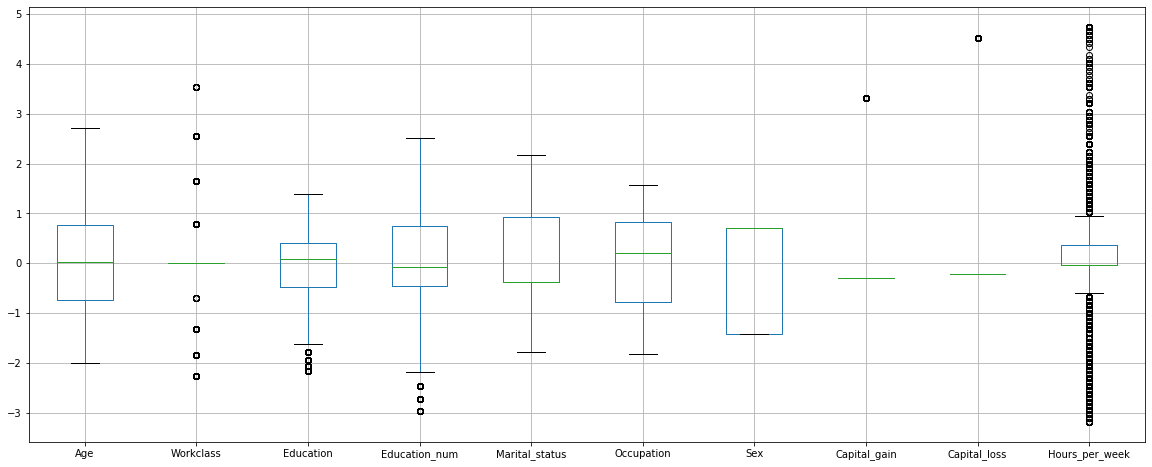

In [31]:
x.boxplot(figsize=[20,8])

# Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
maxacc=0
maxRs=0
for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxRs=i
        print('Best accuracy is', maxacc,'on Random_state', maxRs)

Best accuracy is 1.0 on Random_state 1


We have found best random state value as 1. We will create our Train_test split using this random state(1).

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1, test_size=0.3)

Now our data is ready. Its time to build our model and check its performance. Logestic regression is used for categorical problems and as it is a categorical problem let's first build a Logestic Regression model.

# Logestic Regression

In [35]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,predlr))
print('Confusion Matrix:', confusion_matrix(y_test,predlr))
print('Classification Report:',classification_report(y_test,predlr))

Accuracy score: 0.8173628173628174
Confusion Matrix: [[6963  490]
 [1294 1021]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.93      0.89      7453
           1       0.68      0.44      0.53      2315

    accuracy                           0.82      9768
   macro avg       0.76      0.69      0.71      9768
weighted avg       0.80      0.82      0.80      9768



# DecisionTreeClassifier

In [36]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,preddtc))
print('Confusion Matrix:', confusion_matrix(y_test,preddtc))
print('Classification Report:',classification_report(y_test,preddtc))

Accuracy score: 0.8170556920556921
Confusion Matrix: [[6598  855]
 [ 932 1383]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.89      0.88      7453
           1       0.62      0.60      0.61      2315

    accuracy                           0.82      9768
   macro avg       0.75      0.74      0.74      9768
weighted avg       0.82      0.82      0.82      9768



# RandomForestClassifier

In [37]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,predrfc))
print('Confusion Matrix:', confusion_matrix(y_test,predrfc))
print('Classification Report:',classification_report(y_test,predrfc))

Accuracy score: 0.845004095004095
Confusion Matrix: [[6846  607]
 [ 907 1408]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7453
           1       0.70      0.61      0.65      2315

    accuracy                           0.85      9768
   macro avg       0.79      0.76      0.78      9768
weighted avg       0.84      0.85      0.84      9768



# SVC

In [38]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,predsvc))
print('Confusion Matrix:', confusion_matrix(y_test,predsvc))
print('Classification Report:',classification_report(y_test,predsvc))

Accuracy score: 0.8356879606879607
Confusion Matrix: [[6954  499]
 [1106 1209]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.93      0.90      7453
           1       0.71      0.52      0.60      2315

    accuracy                           0.84      9768
   macro avg       0.79      0.73      0.75      9768
weighted avg       0.83      0.84      0.83      9768



We are getting highest accuracy with RandomForestClassifier(84%) but it can be due to overfitting also so we will check cross validation scores.

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross validation Score is :', scr1.mean())

Cross validation Score is : 0.8138820638820639


In [41]:
scr2=cross_val_score(dtc,x,y,cv=5)
print('Cross validation Score is :', scr2.mean())

Cross validation Score is : 0.8092444717444718


In [42]:
scr3=cross_val_score(rfc,x,y,cv=5)
print('Cross validation Score is :', scr3.mean())

Cross validation Score is : 0.8405405405405405


In [43]:
scr4=cross_val_score(svc,x,y,cv=5)
print('Cross validation Score is :', scr4.mean())

Cross validation Score is : 0.836056511056511


Minimum difference in accuracy abd cross validation scores is for RandomForestClassifier so this is our best model.

# Hyper parameter tunning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
#Creating parameter list to pass in GridSearchCV
parameter={'criterion':['entropy','gini'], 'max_depth':np.arange(2,15)}

In [46]:
gcv=GridSearchCV(rfc,parameter,cv=5)

In [47]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
gcv.best_params_  # Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 14}

In [49]:
predgcv=gcv.best_estimator_.predict(x_test)

In [50]:
accuracy_score(y_test,predgcv)

0.8549344799344799

In [51]:
import joblib

In [52]:
joblib.dump(gcv.best_estimator_, "Census_Income.pk1")

['Census_Income.pk1']

# Conclusion

In this dataset we can conclude that as per our observation RandomForestRegressor is the best model to predict the target variable of our test dataset. This model gives the best prediction solutions as per other model used above.